In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/AI Humanities/21_23피해이륜차종.csv', encoding='utf-8')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2021010100100015,2021년 1월 1일 01시,금요일,서울특별시 강북구 미아동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,57세,상해없음,이륜,남,26세,경상
1,2021010100100060,2021년 1월 1일 11시,금요일,서울특별시 중랑구 중화동,중상사고,0,1,0,0,차대차 - 기타,...,맑음,교차로 - 교차로안,화물,남,67세,상해없음,이륜,남,60세,중상
2,2021010100100098,2021년 1월 1일 14시,금요일,서울특별시 금천구 독산동,중상사고,0,1,0,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,승용,남,28세,상해없음,이륜,남,50세,중상
3,2021010100100181,2021년 1월 1일 19시,금요일,서울특별시 동대문구 전농동,경상사고,0,0,1,1,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,59세,경상,이륜,남,22세,부상신고
4,2021010100100182,2021년 1월 1일 19시,금요일,서울특별시 광진구 화양동,경상사고,0,0,1,0,차대차 - 추돌,...,맑음,단일로 - 기타,승용,남,58세,상해없음,이륜,남,23세,경상


# 데이터 전처리

In [ ]:
df.isnull().sum() #결측치 없음

사고번호          0
사고일시          0
요일            0
시군구           0
사고내용          0
사망자수          0
중상자수          0
경상자수          0
부상신고자수        0
사고유형          0
법규위반          0
노면상태          0
기상상태          0
도로형태          0
가해운전자 차종      0
가해운전자 성별      0
가해운전자 연령      0
가해운전자 상해정도    0
피해운전자 차종      0
피해운전자 성별      0
피해운전자 연령      0
피해운전자 상해정도    0
dtype: int64

In [ ]:
df.columns

Index(['사고번호', '사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도'],
      dtype='object')

## 연령대 전처리

In [ ]:
df["가해운전자 연령"].unique()

array(['57세', '67세', '28세', '59세', '58세', '33세', '36세', '45세', '51세',
       '71세', '31세', '23세', '65세', '70세', '64세', '38세', '50세', '21세',
       '49세', '53세', '42세', '55세', '74세', '46세', '62세', '26세', '40세',
       '34세', '78세', '39세', '56세', '41세', '47세', '44세', '29세', '60세',
       '54세', '66세', '69세', '25세', '35세', '30세', '미분류', '48세', '61세',
       '37세', '63세', '27세', '24세', '43세', '77세', '73세', '20세', '52세',
       '68세', '32세', '72세', '75세', '17세', '79세', '18세', '19세', '22세',
       '82세', '15세', '87세', '76세', '80세', '13세', '11세', '85세', '83세',
       '9세', '81세', '84세', '16세', '91세', '7세', '86세', '12세', '10세', '14세',
       '90세', '88세'], dtype=object)

In [ ]:
df["가해운전자 연령"].value_counts()

가해운전자 연령
61세    406
미분류    371
60세    365
62세    361
52세    349
      ... 
91세      2
7세       1
10세      1
90세      1
88세      1
Name: count, Length: 84, dtype: int64

In [ ]:
import re

# 숫자 부분만 추출하는 함수 정의
def remove_non_numeric(age):
    if isinstance(age, str):
        # 정규 표현식을 사용하여 숫자만 추출
        numeric_part = re.findall(r'\d+', age)
        if numeric_part:
            return int(numeric_part[0])
    return age

# '피해운전자 연령' 컬럼에 함수 적용
df['피해운전자 연령'] =df['피해운전자 연령'].apply(remove_non_numeric)
df['가해운전자 연령'] = df['가해운전자 연령'].apply(remove_non_numeric)


# 결과 확인
print(df['피해운전자 연령'].unique())
print(df['가해운전자 연령'].unique())

[26 60 50 22 23 35 30 21 49 51 73 19 25 28 38 61 16 66 46 33 57 41 44 48
 24 43 56 18 39 47 52 36 40 65 31 17 69 53 20 81 32 29 27 55 64 54 42 37
 59 45 79 34 63 71 75 62 58 78 77 67 72 68 76 70 '미분류' 74 86 14 84 87 80
 82 83 15]
[57 67 28 59 58 33 36 45 51 71 31 23 65 70 64 38 50 21 49 53 42 55 74 46
 62 26 40 34 78 39 56 41 47 44 29 60 54 66 69 25 35 30 '미분류' 48 61 37 63
 27 24 43 77 73 20 52 68 32 72 75 17 79 18 19 22 82 15 87 76 80 13 11 85
 83 9 81 84 16 91 7 86 12 10 14 90 88]


In [ ]:
# '미분류'가 아닌 가해운전자 연령 데이터의 평균을 계산
mean_age = df[df["가해운전자 연령"] != '미분류']["가해운전자 연령"].astype(float).mean()
mean_age1 = df[df["피해운전자 연령"] != '미분류']["피해운전자 연령"].astype(float).mean()

# '미분류' 값을 평균 연령으로 대체
df["가해운전자 연령"] = df["가해운전자 연령"].replace('미분류', mean_age)
df["피해운전자 연령"] = df["피해운전자 연령"].replace('미분류', mean_age1)

In [ ]:
import pandas as pd

# 라벨링 함수
def label_age(age):
    if 1 <= age <10:
        return '10대 미만'
    elif 10 <= age <20:
        return '10대'
    elif 20 <= age <30:
        return '20대'
    elif 30 <= age <40:
        return '30대'
    elif 40 <= age <50:
        return '40대'
    elif 50 <= age <60:
        return '50대'
    elif 60 <= age <70:
        return '60대'
    elif 70 <= age <80:
        return '70대'
    else:
        return '80세 이상'

# '가해운전자 연령' 컬럼에 라벨링 적용
df['가해운전자 연령대'] = df['가해운전자 연령'].apply(label_age)
age_groups = ['10대 미만', '10대', '20대', '30대', '40대','50대','60대','70대','80세 이상']
offend_age_group_counts = df['가해운전자 연령대'].value_counts().reindex(age_groups, fill_value=0)

# '피해운전자 연령' 컬럼에 라벨링 적용
df['피해운전자 연령대'] =df['피해운전자 연령'].apply(label_age)
victim_age_group_counts = df['피해운전자 연령대'].value_counts().reindex(age_groups, fill_value=0)


print(offend_age_group_counts)
print(victim_age_group_counts)

가해운전자 연령대
10대 미만       6
10대        243
20대       1662
30대       2560
40대       2850
50대       3158
60대       3175
70대       1160
80세 이상     130
Name: count, dtype: int64
피해운전자 연령대
10대 미만       0
10대        479
20대       3650
30대       4100
40대       3423
50대       2131
60대        928
70대        205
80세 이상      28
Name: count, dtype: int64


In [ ]:
df['가해운전자 연령대']

0        50대
1        60대
2        20대
3        50대
4        50대
        ... 
14939    70대
14940    60대
14941    50대
14942    60대
14943    60대
Name: 가해운전자 연령대, Length: 14944, dtype: object

## 사고일시 전처리

In [ ]:
df["사고일시"].head()

0    2021년 1월 1일 01시
1    2021년 1월 1일 11시
2    2021년 1월 1일 14시
3    2021년 1월 1일 19시
4    2021년 1월 1일 19시
Name: 사고일시, dtype: object

In [ ]:
# 시간 정보를 추출하는 함수
def extract_hour(time_str):
    match = re.search(r'\d{1,2}시$', time_str)
    if match:
        return match.group()
    else:
        return None

df['시간'] = df['사고일시'].apply(extract_hour)
sorted(df['시간'].unique())

['00시',
 '01시',
 '02시',
 '03시',
 '04시',
 '05시',
 '06시',
 '07시',
 '08시',
 '09시',
 '10시',
 '11시',
 '12시',
 '13시',
 '14시',
 '15시',
 '16시',
 '17시',
 '18시',
 '19시',
 '20시',
 '21시',
 '22시',
 '23시']

In [ ]:
# 시간대를 라벨링하는 함수
def label_time_period(time_str):
    if any(hour in time_str for hour in ['01시', '02시', '03시']):
        return '01:00 - 03:00'
    elif any(hour in time_str for hour in ['04시', '05시', '06시']):
        return '04:00 - 06:00'
    elif any(hour in time_str for hour in ['07시', '08시', '09시']):
        return '07:00 - 09:00'
    elif any(hour in time_str for hour in ['10시', '11시', '12시']):
        return '10:00 - 12:00'
    elif any(hour in time_str for hour in ['13시', '14시', '15시']):
        return '13:00 - 15:00'
    elif any(hour in time_str for hour in ['16시', '17시', '18시']):
        return '16:00 - 18:00'
    elif any(hour in time_str for hour in ['19시', '20시', '21시']):
        return '19:00 - 21:00'
    elif any(hour in time_str for hour in ['22시', '23시', '00시']):
        return '22:00 - 24:00'
    else:
        return '0'


# 데이터프레임에 라벨링 적용
df['사고시간대'] = df['시간'].apply(label_time_period)
df['사고시간대'].value_counts()

사고시간대
19:00 - 21:00    3376
16:00 - 18:00    3168
10:00 - 12:00    2519
13:00 - 15:00    2518
22:00 - 24:00    1636
07:00 - 09:00     906
01:00 - 03:00     482
04:00 - 06:00     339
Name: count, dtype: int64

# 데이터 인코딩

In [ ]:
print(df['사고시간대'].unique())#원핫 인코딩
print(df['요일'].unique()) #원핫 인코딩
print(df['사고내용'].unique()) #레이블 인코딩
print(df['법규위반'].unique()) #원핫 인코딩
print(df['노면상태'].unique()) #원핫 인코딩
print(df['기상상태'].unique()) #원핫 인코딩
print(df['도로형태'].unique()) #원핫 인코딩
print(df['가해운전자 차종'].unique()) #원핫 인코딩
print(df['가해운전자 연령대'].unique()) #원핫 인코딩
print(df['사고유형'].unique()) #원핫 인코딩
print(df['피해운전자 상해정도'].unique()) #레이블 인코딩

['01:00 - 03:00' '10:00 - 12:00' '13:00 - 15:00' '19:00 - 21:00'
 '22:00 - 24:00' '16:00 - 18:00' '04:00 - 06:00' '07:00 - 09:00']
['금요일' '토요일' '일요일' '월요일' '화요일' '수요일' '목요일']
['경상사고' '중상사고' '부상신고사고' '사망사고']
['기타' '안전운전불이행' '안전거리미확보' '차로위반' '신호위반' '중앙선침범' '교차로운행방법위반' '직진우회전진행방해'
 '불법유턴']
['건조' '적설' '젖음/습기' '기타' '서리/결빙' '침수' '해빙']
['맑음' '기타' '흐림' '눈' '비' '안개']
['단일로 - 기타' '교차로 - 교차로안' '기타 - 기타' '교차로 - 교차로부근' '교차로 - 교차로횡단보도내'
 '단일로 - 지하차도(도로)내' '단일로 - 교량' '단일로 - 고가도로위' '단일로 - 터널' '주차장 - 주차장'
 '미분류 - 미분류']
['승용' '화물' '이륜' '개인형이동수단(PM)' '자전거' '승합' '기타불명' '건설기계' '원동기' '특수']
['50대' '60대' '20대' '30대' '40대' '70대' '10대' '80세 이상' '10대 미만']
['차대차 - 기타' '차대차 - 측면충돌' '차대차 - 추돌' '차대차 - 정면충돌' '차대차 - 후진중충돌']
['경상' '중상' '부상신고' '상해없음' '사망' '기타불명']


In [ ]:
input_variables=['사고시간대','요일','사고내용','법규위반','노면상태','기상상태','도로형태','가해운전자 차종','가해운전자 연령대', '사고유형']
output_variable='피해운전자 상해정도'

XM=df[input_variables]
y=df['피해운전자 상해정도']
XM.shape, y.shape

((14944, 10), (14944,))

In [ ]:
XM.columns

Index(['사고시간대', '요일', '사고내용', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종',
       '가해운전자 연령대', '사고유형'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
label_encoder = LabelEncoder()

# 사고내용 레이블 인코딩을 위한 매핑 딕셔너리
accident_content_mapping = {
    '부상신고사고': 0,
    '경상사고': 1,
    '중상사고': 2,
    '사망사고': 3
}

# 피해운전자 상해정도 레이블 인코딩을 위한 매핑 딕셔너리
victim_injury_mapping = {
    '상해없음': 0,
    '부상신고': 1,
    '기타불명': 2,
    '경상': 3,
    '중상': 4,
    '사망': 5
}

# 인코딩할 컬럼들
input_variables=['사고시간대','요일','사고내용','법규위반','노면상태','기상상태','도로형태','가해운전자 차종','가해운전자 연령대', '사고유형']
output_variable='피해운전자 상해정도'

# 원-핫 인코더 초기화
one_hot_encoder = OneHotEncoder(sparse=False)

# 레이블 인코딩 적용
df['사고내용_LabelEncoded'] = df['사고내용'].map(accident_content_mapping)
df['피해운전자 상해정도_LabelEncoded'] = df['피해운전자 상해정도'].map(victim_injury_mapping)

# 원-핫 인코딩 적용 (사고내용과 피해운전자 상해정도 제외)
input_variables.remove('사고내용')
XM = pd.get_dummies(df[input_variables])

# 사고내용과 피해운전자 상해정도 추가
XM['사고내용_LabelEncoded'] = df['사고내용_LabelEncoded']
y = df['피해운전자 상해정도_LabelEncoded']

# 인코딩된 결과 확인
print(XM.head())
print(y)

# 데이터셋의 형태 확인
XM.shape, y.shape

   사고시간대_01:00 - 03:00  사고시간대_04:00 - 06:00  사고시간대_07:00 - 09:00  \
0                 True                False                False   
1                False                False                False   
2                False                False                False   
3                False                False                False   
4                False                False                False   

   사고시간대_10:00 - 12:00  사고시간대_13:00 - 15:00  사고시간대_16:00 - 18:00  \
0                False                False                False   
1                 True                False                False   
2                False                 True                False   
3                False                False                False   
4                False                False                False   

   사고시간대_19:00 - 21:00  사고시간대_22:00 - 24:00  요일_금요일  요일_목요일  ...  \
0                False                False    True   False  ...   
1                False                False   

((14944, 73), (14944,))

In [ ]:
XM.head()

,사고시간대_01:00 - 03:00,사고시간대_04:00 - 06:00,사고시간대_07:00 - 09:00,사고시간대_10:00 - 12:00,사고시간대_13:00 - 15:00,사고시간대_16:00 - 18:00,사고시간대_19:00 - 21:00,사고시간대_22:00 - 24:00,요일_금요일,요일_목요일,...,가해운전자 연령대_50대,가해운전자 연령대_60대,가해운전자 연령대_70대,가해운전자 연령대_80세 이상,사고유형_차대차 - 기타,사고유형_차대차 - 정면충돌,사고유형_차대차 - 추돌,사고유형_차대차 - 측면충돌,사고유형_차대차 - 후진중충돌,사고내용_LabelEncoded
0,True,False,False,False,False,False,False,False,True,False,...,True,False,False,False,True,False,False,False,False,1
1,False,False,False,True,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,2
2,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,2
3,False,False,False,False,False,False,True,False,True,False,...,True,False,False,False,True,False,False,False,False,1
4,False,False,False,False,False,False,True,False,True,False,...,True,False,False,False,False,False,True,False,False,1


In [ ]:
print(y.unique())
print(df['피해운전자 상해정도'].unique())

[3 4 1 0 5 2]
['경상' '중상' '부상신고' '상해없음' '사망' '기타불명']


# 상관관계

**상관관계 값의 해석**
* 1: 두 변수 간의 완벽한 양의 상관관계. 한 변수가 증가할 때 다른 변수도 증가.
* 0: 두 변수 간의 상관관계가 없음. 두 변수 간에 직선적인 관계가 없음.
* -1: 두 변수 간의 완벽한 음의 상관관계. 한 변수가 증가할 때 다른 변수는 감소.

**상관관계의 강도**
* 0.7 ~ 1.0 (또는 -0.7 ~ -1.0): 강한 상관관계
* 0.3 ~ 0.7 (또는 -0.3 ~ -0.7): 중간 정도의 상관관계
* 0.0 ~ 0.3 (또는 -0.3 ~ 0.0): 약한 상관관계

In [ ]:
# 상관관계 행렬 계산
correlation_matrix = XM.corr()
correlation_matrix

,사고시간대_01:00 - 03:00,사고시간대_04:00 - 06:00,사고시간대_07:00 - 09:00,사고시간대_10:00 - 12:00,사고시간대_13:00 - 15:00,사고시간대_16:00 - 18:00,사고시간대_19:00 - 21:00,사고시간대_22:00 - 24:00,요일_금요일,요일_목요일,...,가해운전자 연령대_50대,가해운전자 연령대_60대,가해운전자 연령대_70대,가해운전자 연령대_80세 이상,사고유형_차대차 - 기타,사고유형_차대차 - 정면충돌,사고유형_차대차 - 추돌,사고유형_차대차 - 측면충돌,사고유형_차대차 - 후진중충돌,사고내용_LabelEncoded
사고시간대_01:00 - 03:00,1.000000,-0.027814,-0.046379,-0.082201,-0.082181,-0.094690,-0.098624,-0.064010,-0.017414,0.007444,...,-0.020279,0.007958,-0.010495,-0.017102,-0.018628,0.023069,0.033358,-0.012051,-0.006303,0.034511
사고시간대_04:00 - 06:00,-0.027814,1.000000,-0.038704,-0.068599,-0.068582,-0.079021,-0.082304,-0.053418,0.010224,0.000087,...,-0.000703,0.016454,0.017948,-0.004593,-0.024441,0.012982,0.008479,0.017924,-0.012642,0.042257
사고시간대_07:00 - 09:00,-0.046379,-0.038704,1.000000,-0.114387,-0.114360,-0.131767,-0.137241,-0.089073,0.007926,0.016817,...,0.009301,-0.001020,0.020616,0.000358,-0.010440,-0.007431,0.001504,0.018884,-0.016641,0.029544
사고시간대_10:00 - 12:00,-0.082201,-0.068599,-0.114387,1.000000,-0.202688,-0.233539,-0.243242,-0.157871,-0.009646,-0.004706,...,0.007303,0.009095,0.029705,0.030965,-0.013167,-0.016004,-0.017540,0.028862,0.011827,-0.002879
사고시간대_13:00 - 15:00,-0.082181,-0.068582,-0.114360,-0.202688,1.000000,-0.233483,-0.243184,-0.157833,-0.013431,-0.017974,...,-0.006179,0.004382,0.033770,0.030986,-0.007245,-0.015966,-0.021245,0.018197,0.032248,0.000853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
사고유형_차대차 - 정면충돌,0.023069,0.012982,-0.007431,-0.016004,-0.015966,-0.023009,0.012761,0.037792,-0.000827,-0.010060,...,0.011381,-0.012681,-0.009564,0.005255,-0.200601,1.000000,-0.086569,-0.170749,-0.039090,0.063780
사고유형_차대차 - 추돌,0.033358,0.008479,0.001504,-0.017540,-0.021245,-0.014991,-0.001260,0.043743,0.002247,0.007298,...,-0.013398,-0.021821,0.017900,0.018694,-0.334280,-0.086569,1.000000,-0.284535,-0.065139,-0.022955
사고유형_차대차 - 측면충돌,-0.012051,0.017924,0.018884,0.028862,0.018197,-0.006079,-0.031877,-0.021930,0.000107,0.011378,...,-0.000418,0.014546,0.021373,-0.001099,-0.659339,-0.170749,-0.284535,1.000000,-0.128482,0.085621
사고유형_차대차 - 후진중충돌,-0.006303,-0.012642,-0.016641,0.011827,0.032248,-0.017217,0.008199,-0.018969,0.005419,-0.018877,...,0.004688,0.008130,0.005786,-0.003091,-0.150945,-0.039090,-0.065139,-0.128482,1.000000,-0.078888


**히트맵의 해석**
* 진한 빨간색: 강한 양의 상관관계
* 진한 파란색: 강한 음의 상관관계
* 하얀색 또는 회색: 상관관계가 거의 없음

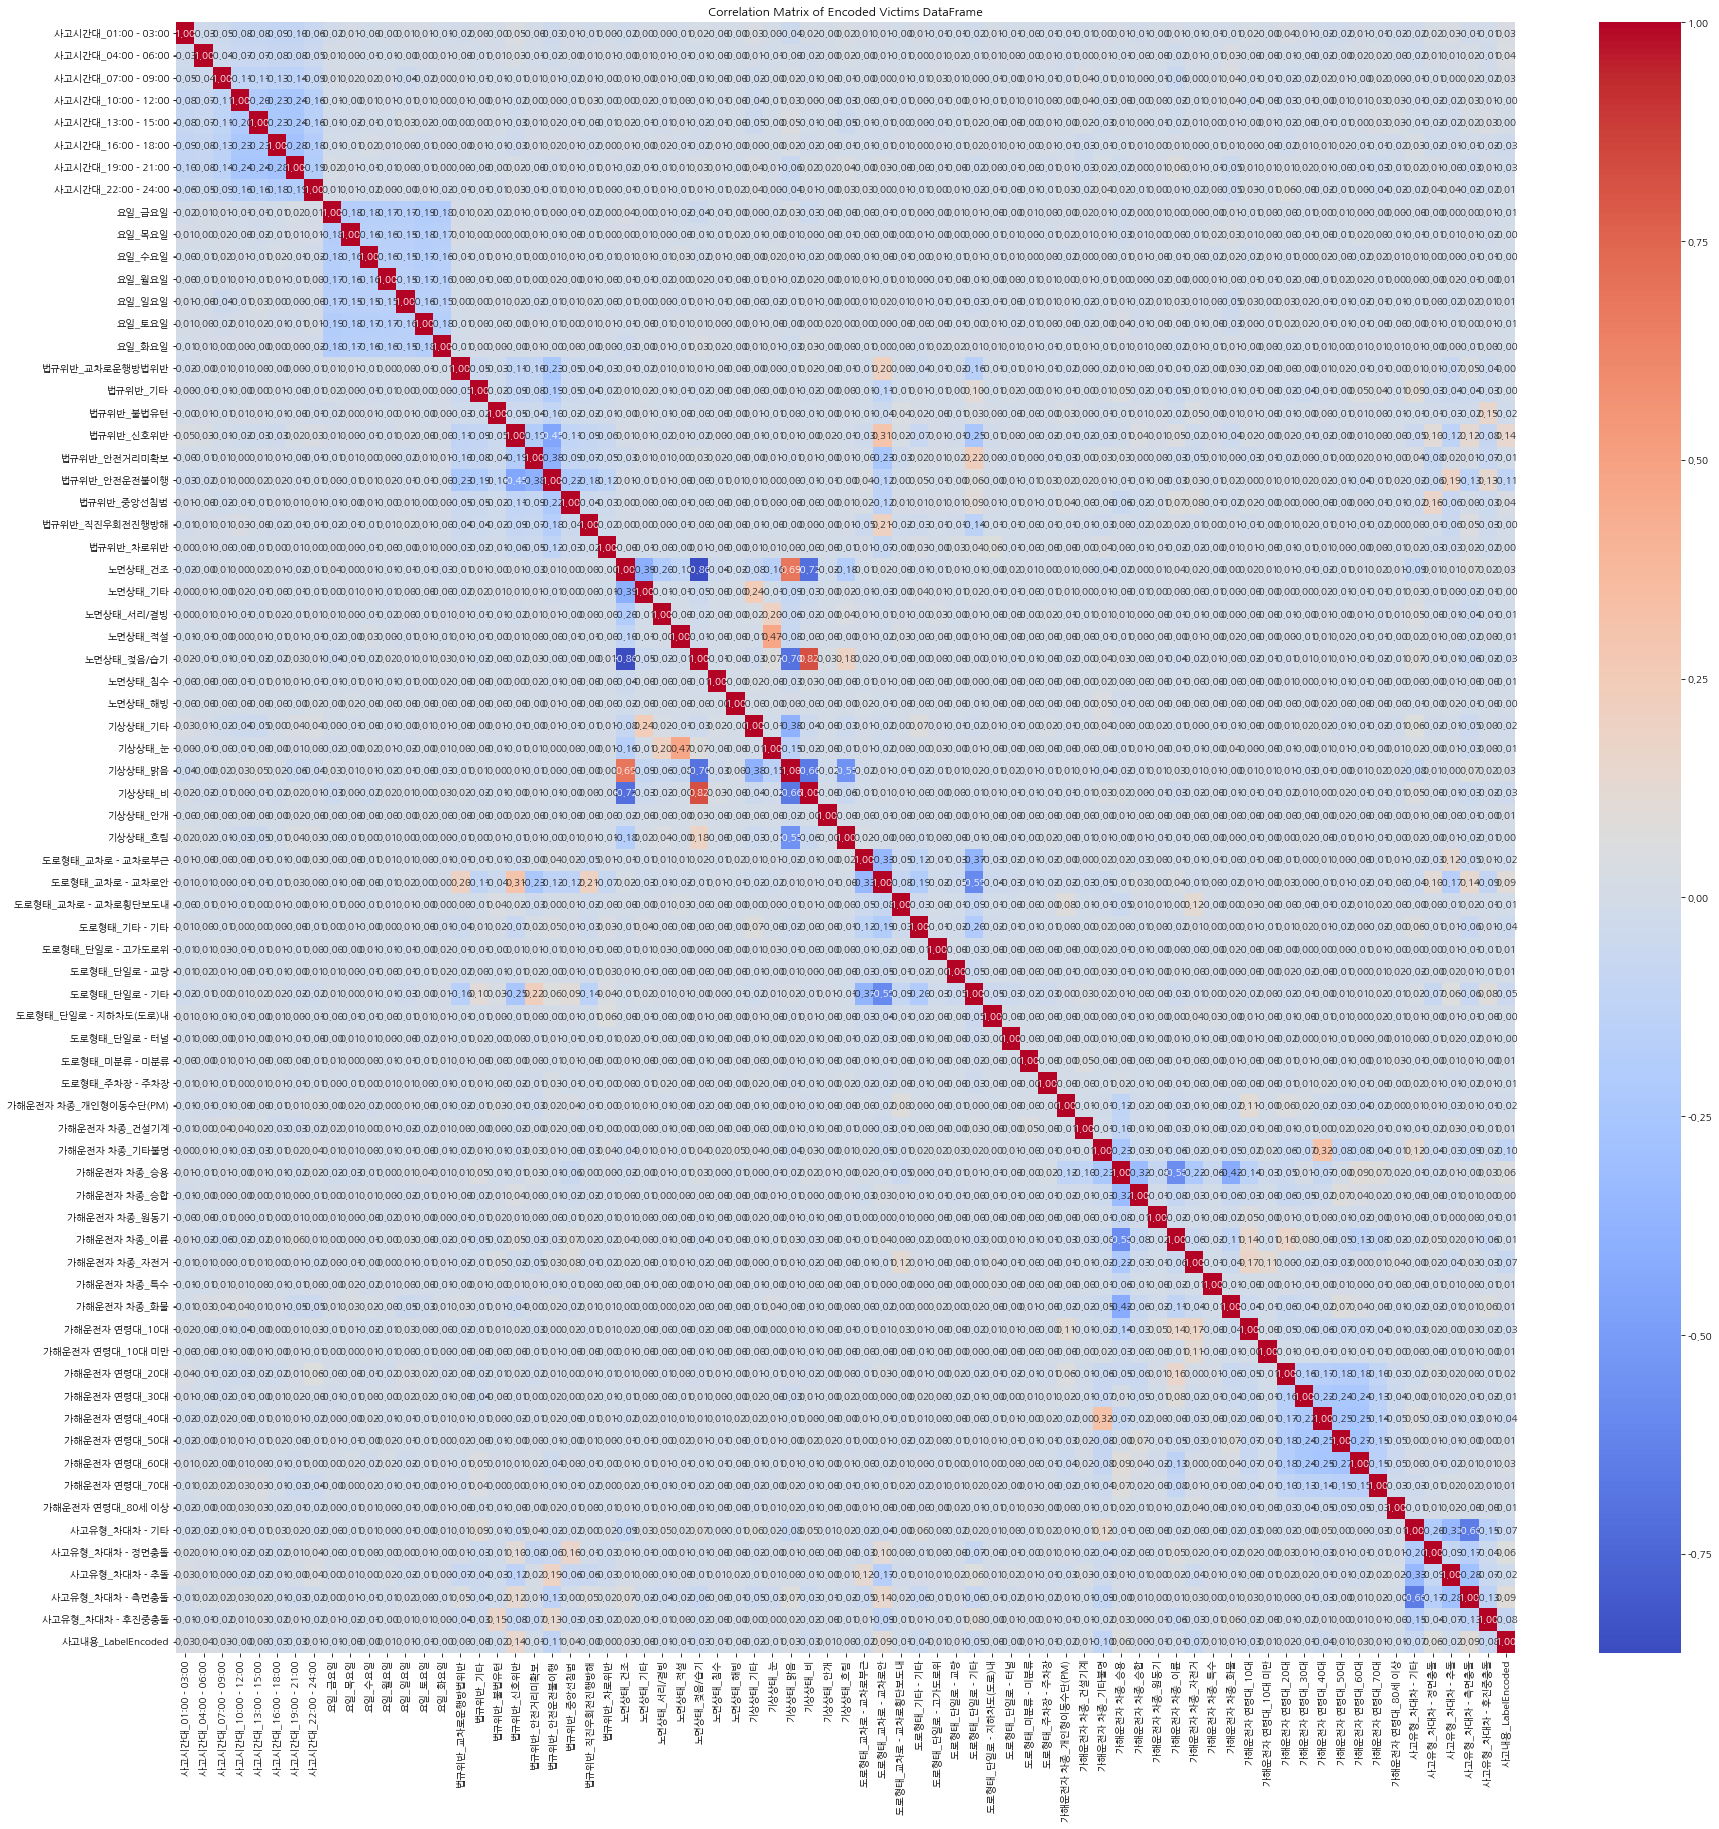

In [ ]:
# 상관관계 히트맵 시각화
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus = False)
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Encoded Victims DataFrame')
plt.show()

array([[<AxesSubplot:title={'center':'사고시간대_01:00 - 03:00'}>,
        <AxesSubplot:title={'center':'사고시간대_04:00 - 06:00'}>,
        <AxesSubplot:title={'center':'사고시간대_07:00 - 09:00'}>,
        <AxesSubplot:title={'center':'사고시간대_10:00 - 12:00'}>,
        <AxesSubplot:title={'center':'사고시간대_13:00 - 15:00'}>,
        <AxesSubplot:title={'center':'사고시간대_16:00 - 18:00'}>,
        <AxesSubplot:title={'center':'사고시간대_19:00 - 21:00'}>,
        <AxesSubplot:title={'center':'사고시간대_22:00 - 24:00'}>,
        <AxesSubplot:title={'center':'요일_금요일'}>],
       [<AxesSubplot:title={'center':'요일_목요일'}>,
        <AxesSubplot:title={'center':'요일_수요일'}>,
        <AxesSubplot:title={'center':'요일_월요일'}>,
        <AxesSubplot:title={'center':'요일_일요일'}>,
        <AxesSubplot:title={'center':'요일_토요일'}>,
        <AxesSubplot:title={'center':'요일_화요일'}>,
        <AxesSubplot:title={'center':'법규위반_교차로운행방법위반'}>,
        <AxesSubplot:title={'center':'법규위반_기타'}>,
        <AxesSubplot:title={'center':'법규위반_불법유턴'}>],


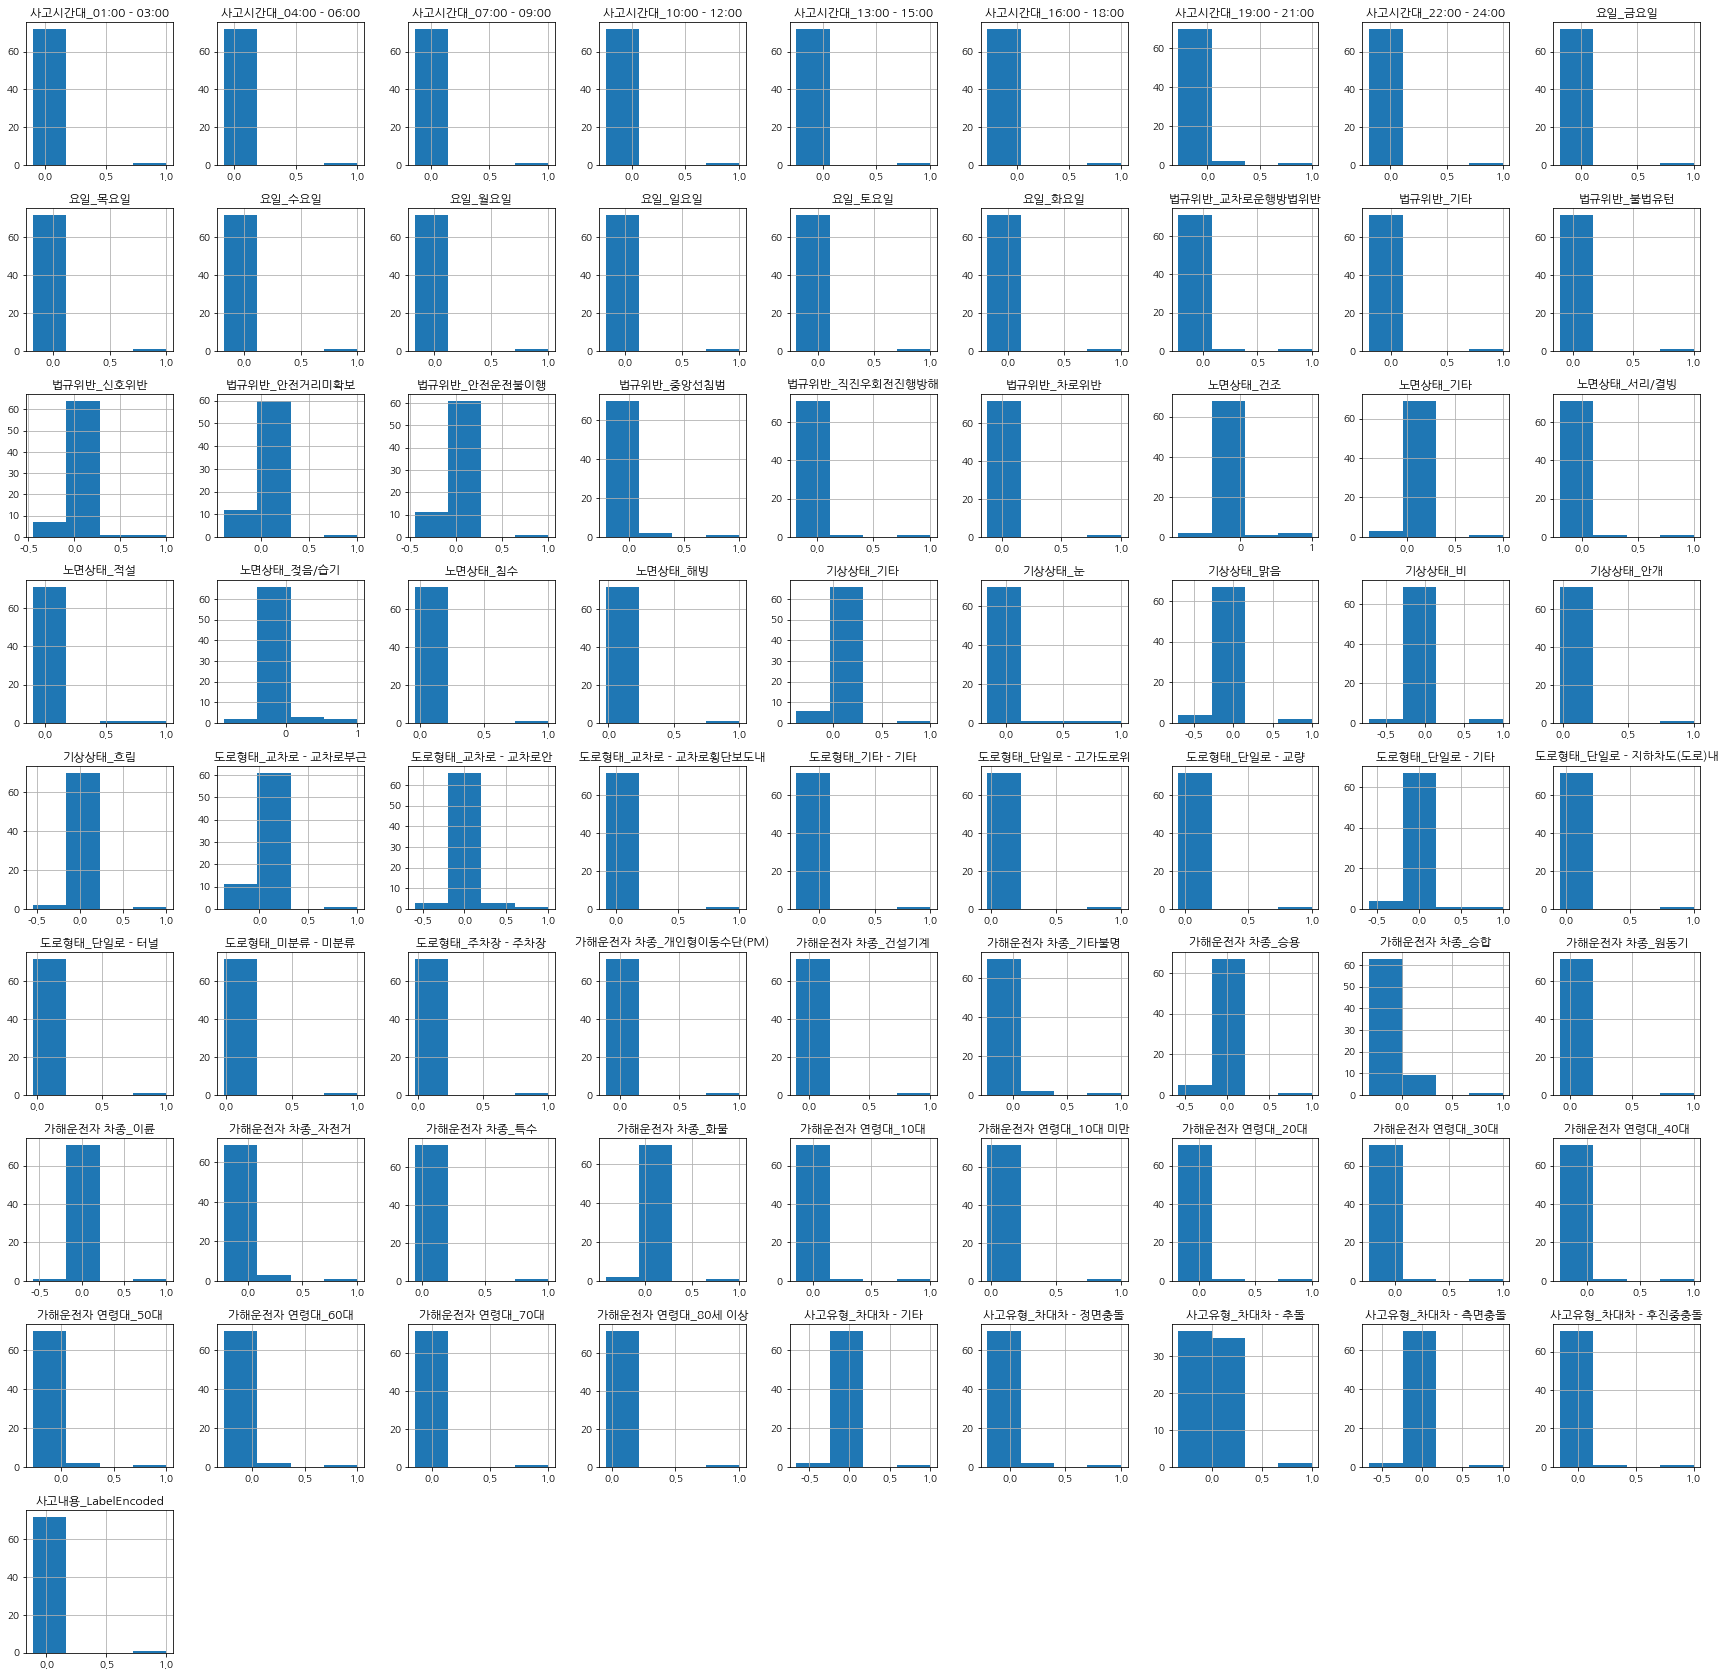

In [ ]:
correlation_matrix.hist(figsize=(30, 30), bins=4)

# ML application

## Scaling / Data Split

In [ ]:
#스케일링
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()
scaler.fit(XM)
X = scaler.transform(XM)

In [ ]:
from sklearn.model_selection import train_test_split

#train, test 8:2로 나누기
X_trn, X_test, y_trn, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_trn.shape, y_trn.shape, X_test.shape, y_test.shape)

#train set을 8:2로 train, validation 나누기
X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=0.2, random_state = 42)
print(X_trn.shape, y_trn.shape, X_val.shape, y_val.shape)

(11955, 73) (11955,) (2989, 73) (2989,)
(9564, 73) (9564,) (2391, 73) (2391,)


## 평가지표

In [ ]:
#평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_valid, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_val, pred)
    accuracy = accuracy_score(y_val, pred)
    precision = precision_score(y_val, pred, average='macro')  # 'macro' average for multiclass
    recall = recall_score(y_val, pred, average='macro')        # 'macro' average for multiclass
    f1 = f1_score(y_val, pred, average='macro')                # 'macro' average for multiclass
    roc_auc = roc_auc_score(y_val, pred_proba, multi_class='ovr')  # for multiclass ROC AUC
    print('오차 행렬:')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}\n'.format(accuracy, precision, recall, f1, roc_auc))

## 기본설정 : LogisticRegression, RandomForest, KNN, XgBoost, LightGBM

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

# LogisticRegression
lg_classifier = LogisticRegression(solver='liblinear', random_state=42)

# RandomForest
rf_classifier = RandomForestClassifier(random_state=42)

# KNN
knn_classifier = KNeighborsClassifier(n_neighbors=8)

# XgBoost
xgb_classifier = xgb.XGBClassifier(random_state=42)

# LightGBM
lgb_classifier = lgb.LGBMClassifier(random_state=42)

# classifiers 학습/예측/평가
classifiers = [lg_classifier, rf_classifier, knn_classifier, xgb_classifier, lgb_classifier]
for classifier in classifiers:
    classifier.fit(X_trn, y_trn)
    pred = classifier.predict(X_val)
    pred_proba = classifier.predict_proba(X_val)
    class_name = classifier.__class__.__name__
    print(f'{class_name}')
    get_clf_eval(y_val, pred, pred_proba)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


LogisticRegression
오차 행렬:
[[  10    0    0   36    7    0]
 [   0    1    0   80    0    0]
 [   0    0    0    8    0    0]
 [  16    1    0 1499   20    0]
 [   0    0    0    0  703    0]
 [   0    0    0    0   10    0]]
정확도: 0.9256, 정밀도: 0.4597, 재현율: 0.3628, F1: 0.3668, AUC:0.9056



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier
오차 행렬:
[[  14    7    0   26    6    0]
 [   3   59    0   19    0    0]
 [   1    0    0    7    0    0]
 [   8    0    0 1508   20    0]
 [   3    0    0    3  697    0]
 [   0    0    0    0   10    0]]
정확도: 0.9527, 정밀도: 0.5487, 재현율: 0.4943, F1: 0.5147, AUC:0.8762



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighborsClassifier
오차 행렬:
[[  13    0    0   37    3    0]
 [   2    3    0   76    0    0]
 [   0    0    0    7    1    0]
 [  14    2    0 1471   49    0]
 [   6    2    0  435  260    0]
 [   0    0    0    4    6    0]]
정확도: 0.7307, 정밀도: 0.3899, 재현율: 0.2683, F1: 0.2829, AUC:0.6948



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBClassifier
오차 행렬:
[[  15    6    0   26    6    0]
 [   6   74    0    1    0    0]
 [   1    0    0    7    0    0]
 [  11    1    0 1504   20    0]
 [   3    0    0    0  699    1]
 [   0    0    0    0    0   10]]
정확도: 0.9628, 정밀도: 0.6969, 재현율: 0.6950, F1: 0.6934, AUC:0.8981

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 9564, number of used features: 63
[LightGBM] [Info] Start training from score -3.656373
[LightGBM] [Info] Start training from score -3.339761
[LightGBM] [Info] Start training from score -5.700025
[LightGBM] [Info] Start training from score -0.469920
[LightGBM] [Info] Start training from score -1.183004
[LightGBM] [Info] Start training from score -5.528175
[LightGBM] [Warning] No further splits wit

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Soft Voting Ensemble(기본 설정 XgBoost, LightGBM)

In [ ]:
from sklearn.ensemble import VotingClassifier

# Soft Voting 기반 앙상블
# 개별 모델로 XgBoost, LightGBM 사용
vo_clf = VotingClassifier(estimators=[('XGB', xgb_classifier), ('LGB', lgb_classifier)], voting='soft')

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_trn, y_trn)
pred = vo_clf.predict(X_val)
pred_proba = vo_clf.predict_proba(X_val)
print('Voting Classifier')
get_clf_eval(y_val, pred, pred_proba)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 9564, number of used features: 63
[LightGBM] [Info] Start training from score -3.656373
[LightGBM] [Info] Start training from score -3.339761
[LightGBM] [Info] Start training from score -5.700025
[LightGBM] [Info] Start training from score -0.469920
[LightGBM] [Info] Start training from score -1.183004
[LightGBM] [Info] Start training from score -5.528175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 임의 설정 CatBoost

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.5 MB/s eta 0:00:00


In [ ]:
!pip install -U imbalanced-learn

In [ ]:
from catboost import CatBoostClassifier

# 오버샘플링
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_trn_resampled, y_trn_resampled = smote.fit_resample(X_trn, y_trn)


# CatBoost 모델 정의
catboost_model = CatBoostClassifier(iterations=200,  # 반복 횟수 설정
                                    learning_rate=0.02,  # 학습률 설정
                                    depth=10,  # 트리의 깊이 설정
                                    eval_metric='AUC',  # 평가 지표 설정
                                    verbose=200,  # 학습 진행 상황 출력 간격 설정
                                    random_seed=42)  # 랜덤 시드 설정

# 모델 학습
catboost_model.fit(X_trn_resampled, y_trn_resampled, eval_set=(X_val, y_val))

# 검증 데이터로 모델 평가
pred = catboost_model.predict(X_val)
pred_proba = catboost_model.predict_proba(X_val)

class_name = classifier.__class__.__name__
print(f'{class_name}')
get_clf_eval(y_val, pred, pred_proba)

0:	test: 0.9192183	best: 0.9192183 (0)	total: 2.05s	remaining: 6m 48s
199:	test: 0.9416701	best: 0.9424453 (179)	total: 4m 26s	remaining: 0us

bestTest = 0.9424452803
bestIteration = 179

Shrink model to first 180 iterations.
LGBMClassifier
오차 행렬:
[[  21   10    0   16    6    0]
 [   2   78    0    1    0    0]
 [   0    1    0    7    0    0]
 [  46    0    5 1465   20    0]
 [   3    0    0    0  699    1]
 [   0    0    0    0    0   10]]
정확도: 0.9506, 정밀도: 0.6709, 재현율: 0.7179, F1: 0.6923, AUC:0.9108



## CatBoost Hyperparameter Tuning by RandomizedSearchCV

In [ ]:
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# SMOTEEIN를 통한 오버샘플링과 언더샘플링 조합
smote_enn = SMOTEENN(random_state=42)
X_trn_resampled, y_trn_resampled = smote_enn.fit_resample(X_trn, y_trn)

# CatBoost 모델 튜닝  #Bayesian Optimization도 시도해보기
catboost_model = CatBoostClassifier(random_seed=42)

# 하이퍼파라미터 그리드 정의
param_distributions = {
    'iterations': [100, 200, 500],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.02, 0.05],
}

## GridSearchCV 통한 Fine Tuning => 시간이 너무 많이 걸림 이슈로
#grid_search = GridSearchCV(catboost_model, param_grid, scoring='roc_auc_ovr', cv=3, verbose=2)
#grid_search.fit(X_trn_resampled, y_trn_resampled)
#best_catboost_model = grid_search.best_estimator_

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(catboost_model, param_distributions, n_iter=10, scoring='roc_auc_ovr', cv=3, verbose=2, random_state=42)

# RandomizedSearchCV를 사용하여 모델 학습 및 튜닝
random_search.fit(X_trn_resampled, y_trn_resampled)

# 최적의 하이퍼파라미터 조합 출력
best_catboost_model = random_search.best_estimator_
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
112:	learn: 0.3539154	total: 39.1s	remaining: 2m 14s
113:	learn: 0.3511838	total: 39.4s	remaining: 2m 13s
114:	learn: 0.3483697	total: 39.7s	remaining: 2m 12s
115:	learn: 0.3457265	total: 40s	remaining: 2m 12s
116:	learn: 0.3430823	total: 40.3s	remaining: 2m 11s
117:	learn: 0.3400088	total: 40.5s	remaining: 2m 11s
118:	learn: 0.3375757	total: 40.8s	remaining: 2m 10s
119:	learn: 0.3350291	total: 41.1s	remaining: 2m 10s
120:	learn: 0.3324213	total: 41.4s	remaining: 2m 9s
121:	learn: 0.3298361	total: 41.7s	remaining: 2m 9s
122:	learn: 0.3275980	total: 41.9s	remaining: 2m 8s
123:	learn: 0.3250980	total: 42.2s	remaining: 2m 8s
124:	learn: 0.3223985	total: 42.5s	remaining: 2m 7s
125:	learn: 0.3202249	total: 42.8s	remaining: 2m 7s
126:	learn: 0.3174335	total: 43.1s	remaining: 2m 6s
127:	learn: 0.3151364	total: 43.4s	remaining: 2m 5s
128:	learn: 0.3128789	total: 43.6s	remaining: 2m 5s
129:	learn: 0.3104437	total: 43.9s	remaining: 2m 5s
130:	learn: 0.3084718	

In [ ]:
#평가
best_catboost_model.fit(X_trn, y_trn)
pred = best_catboost_model.predict(X_val)
pred_proba = best_catboost_model.predict_proba(X_val)
get_clf_eval(y_val, pred, pred_proba)

0:	learn: 1.5764148	total: 14.2ms	remaining: 7.07s
1:	learn: 1.4127790	total: 23.5ms	remaining: 5.86s
2:	learn: 1.2836063	total: 37.6ms	remaining: 6.23s
3:	learn: 1.1762852	total: 47.4ms	remaining: 5.88s
4:	learn: 1.0874255	total: 58.9ms	remaining: 5.83s
5:	learn: 1.0087832	total: 67.4ms	remaining: 5.55s
6:	learn: 0.9401730	total: 81.3ms	remaining: 5.72s
7:	learn: 0.8785673	total: 95ms	remaining: 5.84s
8:	learn: 0.8259892	total: 110ms	remaining: 5.98s
9:	learn: 0.7775521	total: 123ms	remaining: 6.04s
10:	learn: 0.7322342	total: 144ms	remaining: 6.38s
11:	learn: 0.6909219	total: 158ms	remaining: 6.41s
12:	learn: 0.6543797	total: 166ms	remaining: 6.22s
13:	learn: 0.6215406	total: 180ms	remaining: 6.24s
14:	learn: 0.5917851	total: 194ms	remaining: 6.26s
15:	learn: 0.5640174	total: 207ms	remaining: 6.28s
16:	learn: 0.5388064	total: 216ms	remaining: 6.13s
17:	learn: 0.5156990	total: 226ms	remaining: 6.06s
18:	learn: 0.4933706	total: 242ms	remaining: 6.13s
19:	learn: 0.4721302	total: 256ms	r

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Tuned LightGBM

In [ ]:
import numpy as np
from scipy.stats import randint
from imblearn.combine import SMOTEENN
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

# SMOTEENN를 통한 오버샘플링과 언더샘플링 조합
smote_enn = SMOTEENN(random_state=42)
X_trn_resampled, y_trn_resampled = smote_enn.fit_resample(X_trn, y_trn)


# LightGBM
lgb_model = lgb.LGBMClassifier()

# hyperparameter 분포
param_dist = {
    'n_estimators': np.arange(100, 3001, 100), #결정 트리의 개수
    'num_leaves': randint(20, 50),
    'learning_rate': np.arange(0.005, 0.31, 0.001), #학습률
    'max_depth': np.arange(5, 30, 1), #트리의 최대 깊이
    'min_child_samples': randint(10, 50),
    'subsample': np.arange(0.8, 1.01, 0.1), #학습시 데이터 샘플링 비율
    'colsample_bytree': np.arange(0.8, 1.01, 0.1) #학습시 피처 샘플링 비율
}

# 하이퍼파라미터 튜닝을 위한 RandomSearchCV 이용
random_search = RandomizedSearchCV(estimator=lgb_model,
                                   param_distributions=param_dist,
                                   n_iter=10,  # 100개의 무작위 하이퍼파라미터 조합 시도
                                   scoring='roc_auc_ovr',
                                   cv=3, # 3-폴드 교차 검증 수행
                                   verbose=2, # 상세한 로그 출력
                                   n_jobs=-1, # 모든 가용한 CPU 코어 사용
                                   random_state=42)

random_search.fit(X_trn_resampled, y_trn_resampled)

# 최적의 하이퍼파라미터 조합 출력
best_lgbm_model = random_search.best_estimator_
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
# 최적의 하이퍼파라미터 기준으로 모델 생성
best_lgbm_model = lgb.LGBMClassifier(
    n_estimators=random_search.best_params_['n_estimators'],
    num_leaves=random_search.best_params_['num_leaves'],
    learning_rate=random_search.best_params_['learning_rate'],
    max_depth=random_search.best_params_['max_depth'],
    min_child_samples=random_search.best_params_['min_child_samples'],
    subsample=random_search.best_params_['subsample'],
    colsample_bytree=random_search.best_params_['colsample_bytree']
)

# 학습
best_lgbm_model.fit(X_trn, y_trn)

# 평가
y_pred = best_lgbm_model.predict(X_val)
y_pred_proba = best_lgbm_model.predict_proba(X_val)
get_clf_eval(y_val , y_pred, y_pred_proba)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Tuned Ensemble

In [ ]:
# 앙상블 모델 정의
voting_clf = VotingClassifier(
    estimators=[('catboost', best_catboost_model),('xgb', xgb_classifier), ('lgb', best_lgbm_model)],
    voting='soft'
)

# 앙상블 모델 학습
voting_clf.fit(X_trn_resampled, y_trn_resampled)

# 모델 평가
pred = voting_clf.predict(X_val)
pred_proba = voting_clf.predict_proba(X_val)
print('Voting Classifier')
get_clf_eval(y_val, pred, pred_proba)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## SHAP Summary Plot

feature_0 :	 0.05683760793679768
feature_1 :	 0.07662783323824938
feature_2 :	 0.16476003438513656
feature_3 :	 1.1297548644334423
feature_4 :	 0.8396870205536723
feature_5 :	 1.0272292654411836
feature_6 :	 1.18399395563023
feature_7 :	 0.3945134812462861
feature_8 :	 1.0257624574650535
feature_9 :	 0.9250330905690064
feature_10 :	 0.5514100987748572
feature_11 :	 0.9141223206934244
feature_12 :	 0.658293149066709
feature_13 :	 0.7456044400334717
feature_14 :	 0.465583094464135
feature_15 :	 0.04602792976983948
feature_16 :	 0.5918553385557941
feature_17 :	 0.03013950918035477
feature_18 :	 0.4603211716993031
feature_19 :	 0.3402265303793732
feature_20 :	 1.6730335749510068
feature_21 :	 0.09650229396410351
feature_22 :	 0.0559533125640788
feature_23 :	 0.024629308726427754
feature_24 :	 0.12171336881024268
feature_25 :	 0.03744568795328046
feature_26 :	 0.009718354376690016
feature_27 :	 0.00047275469508943033
feature_28 :	 0.07411581729261926
feature_29 :	 0.004927808933377796
featu

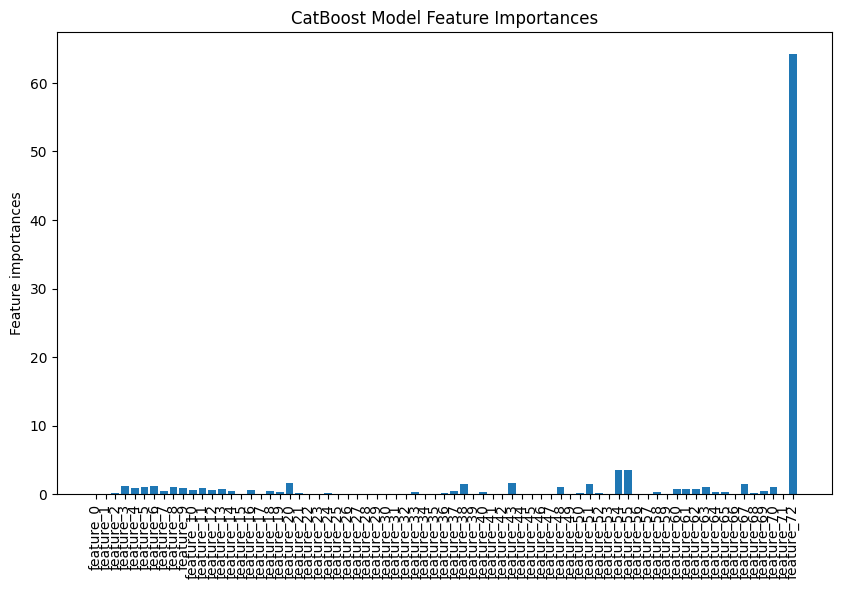

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from catboost import Pool

# 피처 이름 정의 (예시에서는 X_trn의 컬럼 이름 사용)
# 실제 사용 시, 데이터셋에 맞게 수정
feature_names = [f'feature_{i}' for i in range(X_trn_resampled.shape[1])]

# Pool 객체 생성
train_pool = Pool(X_trn_resampled, label=y_trn_resampled)

# CatBoost 피처 중요도 계산
feature_importances = best_catboost_model.get_feature_importance(train_pool)

# 피처 중요도 출력 및 시각화
for col, fi in zip(feature_names, feature_importances):
    print(col, ':\t', fi)

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances)
plt.xticks(rotation=90)
plt.ylabel('Feature importances')
plt.title('CatBoost Model Feature Importances')
plt.show()

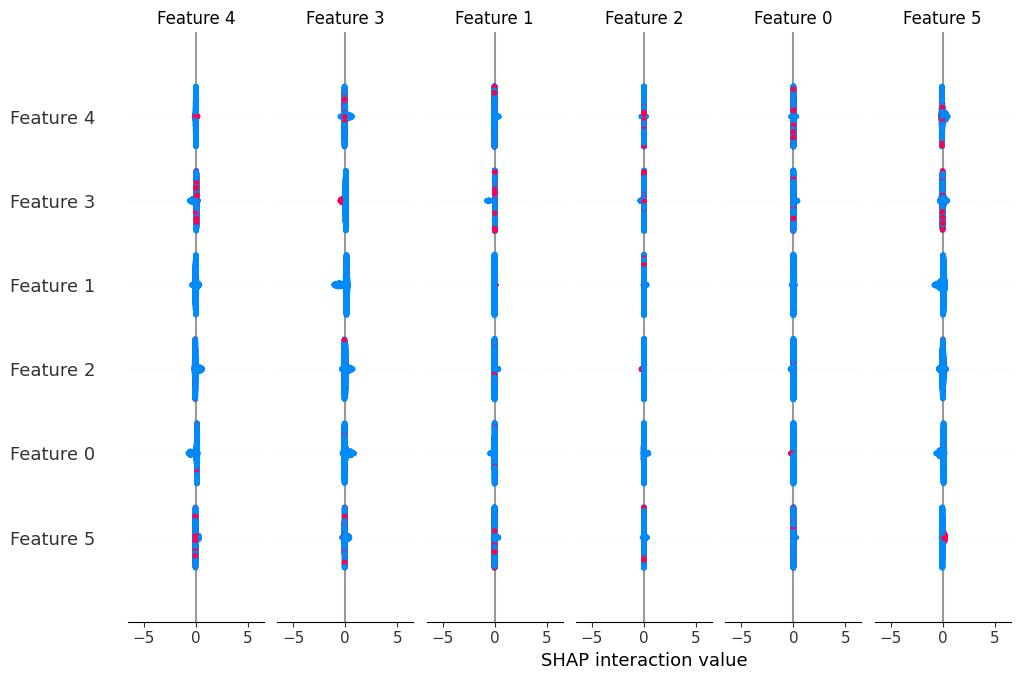

In [ ]:
import shap

explainer = shap.TreeExplainer(best_catboost_model)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val)

feature_0 :	 1065
feature_1 :	 471
feature_2 :	 2631
feature_3 :	 7497
feature_4 :	 10412
feature_5 :	 10660
feature_6 :	 11425
feature_7 :	 4207
feature_8 :	 7521
feature_9 :	 3798
feature_10 :	 8058
feature_11 :	 7057
feature_12 :	 8527
feature_13 :	 5200
feature_14 :	 7555
feature_15 :	 995
feature_16 :	 3142
feature_17 :	 437
feature_18 :	 5178
feature_19 :	 4690
feature_20 :	 14644
feature_21 :	 1170
feature_22 :	 794
feature_23 :	 306
feature_24 :	 988
feature_25 :	 503
feature_26 :	 93
feature_27 :	 0
feature_28 :	 529
feature_29 :	 0
feature_30 :	 0
feature_31 :	 463
feature_32 :	 52
feature_33 :	 1254
feature_34 :	 584
feature_35 :	 0
feature_36 :	 816
feature_37 :	 5880
feature_38 :	 10523
feature_39 :	 639
feature_40 :	 2977
feature_41 :	 0
feature_42 :	 159
feature_43 :	 12743
feature_44 :	 376
feature_45 :	 9
feature_46 :	 0
feature_47 :	 0
feature_48 :	 1690
feature_49 :	 213
feature_50 :	 814
feature_51 :	 11562
feature_52 :	 1804
feature_53 :	 343
feature_54 :	 15077
fe

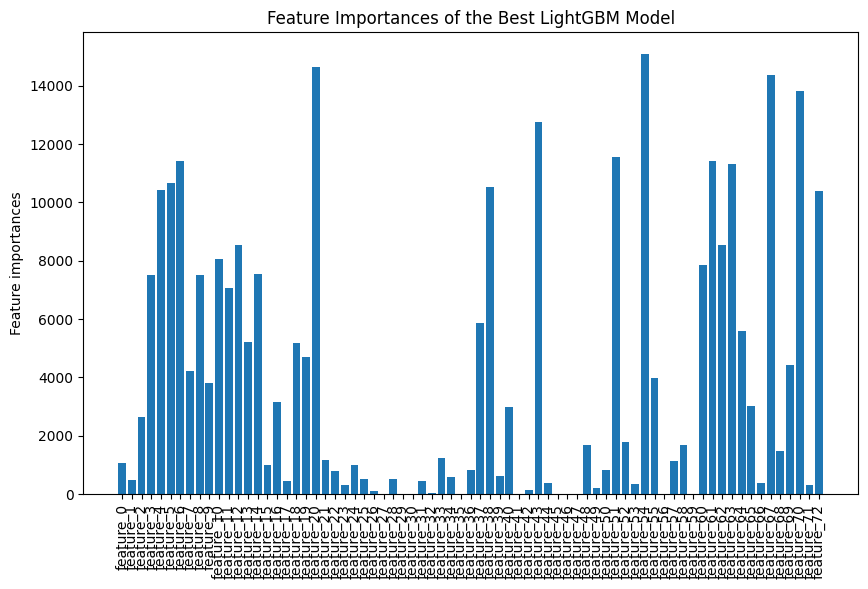

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 피처 중요도 계산
feature_importances = best_lgbm_model.feature_importances_

# 피처 이름 정의 (예시에서는 X_trn의 컬럼 이름 사용)
# 실제 사용 시, 데이터셋에 맞게 수정
feature_names = [f'feature_{i}' for i in range(X_trn_resampled.shape[1])]

# 피처 중요도 출력
for col, fi in zip(feature_names, feature_importances):
    print(col, ':\t', fi)

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances)
plt.xticks(rotation=90)
plt.ylabel('Feature importances')
plt.title('Feature Importances of the Best LightGBM Model')
plt.show()

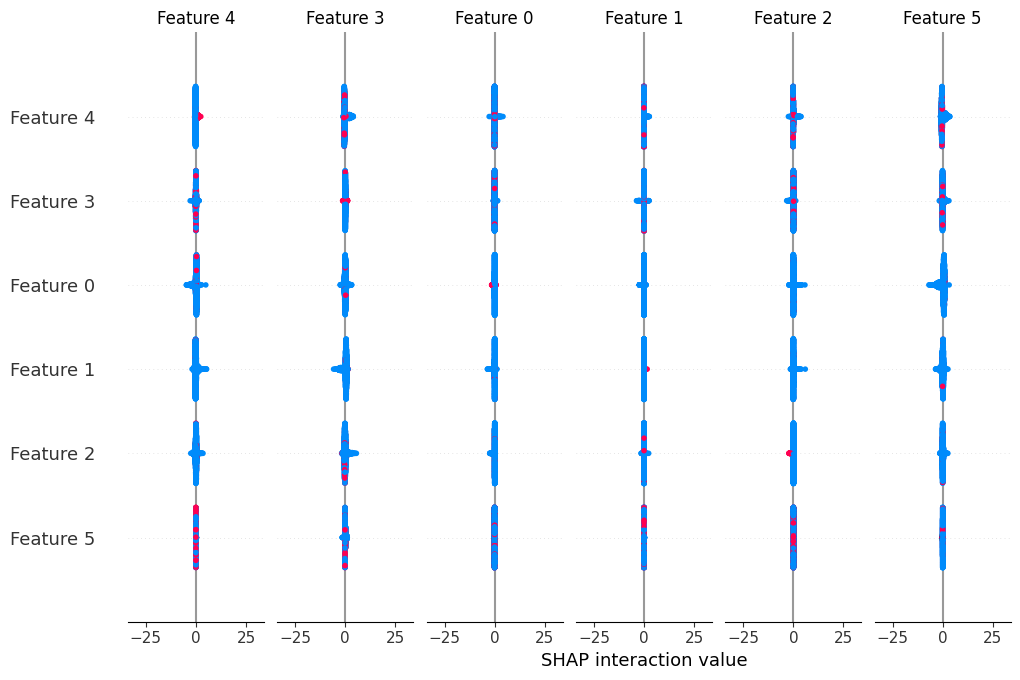

In [ ]:
import shap

explainer = shap.TreeExplainer(best_lgbm_model)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val)

feature_0 :	 161.6704263289042
feature_1 :	 148.3762166787482
feature_2 :	 465.85439624952147
feature_3 :	 1375.4331753130248
feature_4 :	 1529.34987235101
feature_5 :	 1379.4447007958686
feature_6 :	 1326.4414454898263
feature_7 :	 636.2660880618449
feature_8 :	 1200.488029371421
feature_9 :	 1049.2177690382825
feature_10 :	 1119.58979074721
feature_11 :	 1182.572969959664
feature_12 :	 994.0036924200808
feature_13 :	 838.685884292368
feature_14 :	 768.05780561266
feature_15 :	 241.36880117401276
feature_16 :	 466.1905662979418
feature_17 :	 56.671302234110776
feature_18 :	 822.9271480064499
feature_19 :	 1067.715867015757
feature_20 :	 2377.71412321193
feature_21 :	 255.03568336258533
feature_22 :	 222.015674109677
feature_23 :	 54.00010616352665
feature_24 :	 357.7000045523534
feature_25 :	 211.35185683169564
feature_26 :	 31.333370448309527
feature_27 :	 0.0
feature_28 :	 168.02146825448753
feature_29 :	 0.6666666666666666
feature_30 :	 0.0
feature_31 :	 119.68382306594191
feature_

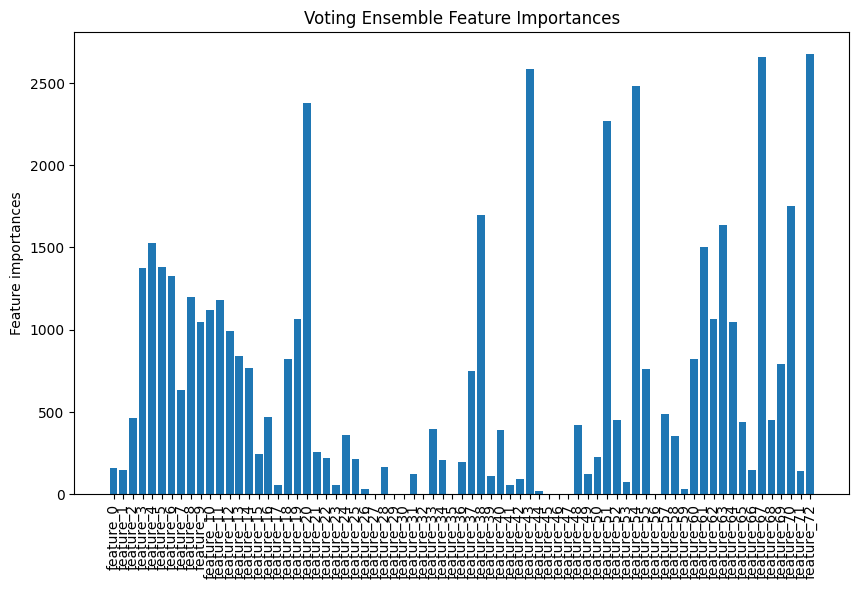

In [ ]:
# Tuned voting_clf Ensemble
# 개별 모델의 피처 중요도 계산 및 결합
feature_importances = np.zeros(X.shape[1])

for clf in voting_clf.estimators_:
    if hasattr(clf, 'feature_importances_'):
        feature_importances += clf.feature_importances_

# 피처 중요도 평균내기
feature_importances /= len([clf for clf in voting_clf.estimators_ if hasattr(clf, 'feature_importances_')])
feature_names = [f'feature_{i}' for i in range(X.shape[1])]

# 피처 중요도 출력 및 시각화
for col, fi in zip(feature_names, feature_importances):
    print(col, ':\t', fi)

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances)
plt.xticks(rotation=90)
plt.ylabel('Feature importances')
plt.title('Voting Ensemble Feature Importances')
plt.show()

## Sample Prediction

In [ ]:
#best_lgbm_model_pred: Test Prediction
best_lgbm_model_pred =best_lgbm_model.predict(X_test)
print(best_lgbm_model_pred)

[4 1 3 ... 3 3 3]


In [ ]:
#best_catboost_model_pred: Test Prediction
best_catboost_model_pred =best_catboost_model.predict(X_test)
print(best_catboost_model_pred)

[[4]
 [1]
 [3]
 ...
 [3]
 [3]
 [3]]


In [ ]:
#voting_clf_pred: Test Prediction
voting_clf_pred =voting_clf.predict(X_test)
print(voting_clf_pred)

[4 1 3 ... 3 3 3]


## 생성형AI 메세지 생성